# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [23]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible
##PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [24]:
 # load the data
pd.set_option('display.max_columns',None)

df = pd.read_csv("/Users/MamaAmakah/Downloads/Courses/ML_Advanced Regression/predict practice docs/Advanced-Regression-Starter-Data/df_train.csv",index_col=0)

In [25]:
#view data
df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333   

In [26]:
df.tail()

time  Madrid_wind_speed Valencia_wind_deg  \
8758  2017-12-31 09:00:00           1.000000           level_6   
8759  2017-12-31 12:00:00           5.000000           level_6   
8760  2017-12-31 15:00:00           6.333333           level_9   
8761  2017-12-31 18:00:00           7.333333           level_8   
8762  2017-12-31 21:00:00           4.333333           level_9   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8758             0.0             2.666667         89.000000        95.666667   
8759             0.0             2.000000         82.000000        85.000000   
8760             0.4             7.333333         67.666667        71.000000   
8761             0.2             7.333333         67.666667        79.000000   
8762             0.0             7.000000         78.666667        68.666667   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
8758          56.666667           4.333333           80.000000   
8759          26.666667           8.000000           75.000000   
8760          63.333333           8.333333           33.333333   
8761          63.333333           2.666667           51.666667   
8762          20.000000           1.666667           33.333333   

      Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
8758       226.666667              1.666667           83.666667   
8759       220.000000              3.000000          213.333333   
8760       283.333333              5.333333          256.666667   
8761       220.000000              5.333333          250.000000   
8762       156.666667              4.333333          253.333333   

      Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  \
8758          45.000000            1.000000                0.0   
8759          85.000000            1.666667                0.0   
8760          85.000000            3.666667                0.0   
8761          56.666667            4.333333                0.0   
8762           0.000000            1.666667                0.0   

     Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  \
8758             sp23              0.0             0.0         1021.000000   
8759             sp23              0.0             0.0         1019.000000   
8760             sp22              0.0             0.0         1015.666667   
8761             sp23              0.0             0.0         1015.000000   
8762             sp25              0.0             0.0         1016.000000   

      Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  \
8758              0.0             0.0                0.0               0.0   
8759              0.0             0.0                0.0               0.0   
8760              0.0             0.1                0.0               0.0   
8761              0.0             0.3                0.0               0.0   
8762              0.0             0.0                0.0               0.0   

      Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
8758         727.666667                 801.0      1017.666667   
8759         762.000000                 801.0      1015.333333   
8760         702.333333                 801.0      1017.333333   
8761         500.000000                 800.0      1020.333333   
8762         800.000000                 800.0      1023.666667   

      Seville_weather_id  Valencia_pressure  Seville_temp_max  \
8758          769.333333                NaN        285.483333   
8759          803.000000        1021.000000        288.483333   
8760          801.666667        1009.666667        291.483333   
8761          802.333333        1020.000000        291.483333   
8762          801.666667                NaN        289.150000   

      Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  \
8758      1024.000000         282.483333     282.483333         802.333333   
8759      1023.666667         291.816667     291.816667         

In [27]:
#check shape of data
df.shape

(8763, 48)

In [28]:
#check the percetage of the columns with missing values
round((df.isnull().sum()/df.shape[0])*100,2).astype(str)+'%'

time                     0.0%
Madrid_wind_speed        0.0%
Valencia_wind_deg        0.0%
Bilbao_rain_1h           0.0%
Valencia_wind_speed      0.0%
Seville_humidity         0.0%
Madrid_humidity          0.0%
Bilbao_clouds_all        0.0%
Bilbao_wind_speed        0.0%
Seville_clouds_all       0.0%
Bilbao_wind_deg          0.0%
Barcelona_wind_speed     0.0%
Barcelona_wind_deg       0.0%
Madrid_clouds_all        0.0%
Seville_wind_speed       0.0%
Barcelona_rain_1h        0.0%
Seville_pressure         0.0%
Seville_rain_1h          0.0%
Bilbao_snow_3h           0.0%
Barcelona_pressure       0.0%
Seville_rain_3h          0.0%
Madrid_rain_1h           0.0%
Barcelona_rain_3h        0.0%
Valencia_snow_3h         0.0%
Madrid_weather_id        0.0%
Barcelona_weather_id     0.0%
Bilbao_pressure          0.0%
Seville_weather_id       0.0%
Valencia_pressure       23.6%
Seville_temp_max         0.0%
Madrid_pressure          0.0%
Valencia_temp_max        0.0%
Valencia_temp            0.0%
Bilbao_wea

In [29]:
# understand what the data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [30]:
# look at data statistics
df.describe()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count        8763.000000     8763.000000          8763.000000   
mean            2.425729        0.135753             2.586272   
std             1.850371        0.374901             2.411190   
min             0.000000        0.000000             0.000000   
25%             1.000000        0.000000             1.000000   
50%             2.000000        0.000000             1.666667   
75%             3.333333        0.100000             3.666667   
max            13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count        8763.000000         8763.000000      8763.000000   
mean            1.850356           13.714748       158.957511   
std             1.695888           24.272482       102.056299   
min             0.000000            0.000000         0.000000   
25%             0.666667            0.000000        73.333333   
50%             1.000000            0.000000       147.000000   
75%             2.666667           20.000000       234.000000   
max            12.666667           97.333333       359.333333   

       Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
count           8763.000000         8763.000000        8763.000000   
mean               2.870497          190.544848          19.473392   
std                1.792197           89.077337          28.053660   
min                0.000000            0.000000           0.000000   
25%                1.666667          118.166667           0.000000   
50%                2.666667          200.000000           0.000000   
75%                4.000000          260.000000          33.333333   
max               12.666667          360.000000         100.000000   

       Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
count         8763.000000        8763.000000      8763.000000     8763.000000   
mean             2.425045           0.128906         0.039439        0.031912   
std              1.672895           0.634730         0.175857        0.557264   
min              0.000000           0.000000         0.000000        0.000000   
25%              1.000000           0.000000         0.000000        0.000000   
50%              2.000000           0.000000         0.000000        0.000000   
75%              3.333333           0.000000         0.000000        0.000000   
max             11.666667          12.000000         3.000000       21.300000   

       Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
count        8.763000e+03      8763.000000     8763.000000        8763.000000   
mean         1.377965e+03         0.000243        0.037818           0.000439   
std          1.407314e+04         0.003660        0.152639           0.003994   
min          6.706667e+02         0.000000        0.000000           0.000000   
25%          1.014000e+03         0.000000        0.000000           0.000000   
50%          1.018000e+03         0.000000        0.000000           0.000000   
75%          1.022000e+03         0.000000        0.000000           0.000000   
max          1.001411e+06         0.093333        3.000000           0.093000   

       Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  \
count       8763.000000        8763.000000           8763.000000   
mean           0.000205         773.5275

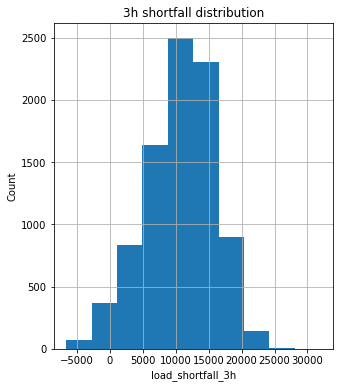

In [31]:
# plot relevant feature interactions

#graph showing distribution of load_shortfall_3h
plt.title('3h shortfall distribution')
df['load_shortfall_3h'].hist(figsize=(5,6))
plt.xlabel('load_shortfall_3h')
plt.ylabel('Count')
plt.show()

In [32]:
# evaluate correlation


<AxesSubplot:>

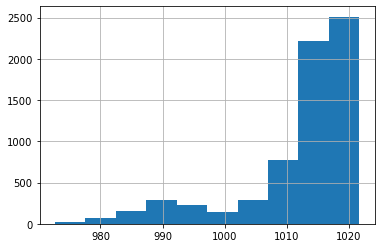

In [33]:
# have a look at feature distributions
#check the distribution of Valencia Pressure
df.Valencia_pressure.hist()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [34]:
# remove missing values/ features
#impute the missing values with the median
median=df['Valencia_pressure'].median()
df['Valencia_pressure'].fillna(median,inplace=True)

In [35]:
# understand what the data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [36]:
#converting Seville pressure to float
#removing the sp in the seville pressure column
df["sp"]=df["Seville_pressure"].str.replace("sp", "")
df['sp'] = pd.to_numeric(df['sp'])
df['sp'] = df['sp'].map(float)

#drop old column and rename new column
df.drop(["Seville_pressure"],axis=1,inplace=True)

In [37]:
#rename new column and view new table
df.rename({'sp': 'Seville_pressure'}, axis=1, inplace=True)
df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   
3  2015-01-01 12:00:00           1.000000           level_8             0.0   
4  2015-01-01 15:00:00           1.000000           level_7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
0            3.333333                0.0              0.0             0.0   
1            3.333333                0.0              0.0             0.0   
2            2.666667                0.0              0.0             0.0   
3            4.000000                0.0              0.0             0.0   
4            3.000000                0.0              0.0             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0         1036.333333              0.0             0.0                0.0   
1         1037.333333              0.0             0.0                0.0   
2         1038.000000              0.0             0.0                0.0   
3         1037.000000              0.0             0.0                0.0   
4         1035.000000              0.0             0.0                0.0   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0              800.0                 800.0      1035.000000   
1               0.0              800.0                 800.0      1035.666667   
2               0.0              800.0                 800.0      1036.000000   
3               0.0              800.0                 800.0      1036.000000   
4               0.0              800.0                 800.0      1035.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   
2               800.0        1005.333333        278.792000       974.000000   
3               800.0        1009.000000        285.394000       994.666667   
4               800.0        1015.000000        285.513719      1035.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   
2         278.008667     278.008667              800.0    278.792000   
3         284.899552     284.899552              800.0    285.394000   
4         283.015115     283.015115              8

In [38]:
#converting Valencia_wind_deg to Vwd
#removing the sp in the seville pressure column
df["Vwd"]=df["Valencia_wind_deg"].str.replace("level_", "")
df['Vwd'] = pd.to_numeric(df['Vwd'])

#converting the values of the new column to float
df['Vwd'] = df['Vwd'].map(float)

#drop old column and rename new column
df.drop(["Valencia_wind_deg"],axis=1,inplace=True)

#rename new column and view new table
df.rename({'Vwd': 'Valencia_wind_deg'}, axis=1, inplace=True)
df.head()

time  Madrid_wind_speed  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667             0.0   
1  2015-01-01 06:00:00           0.333333             0.0   
2  2015-01-01 09:00:00           1.000000             0.0   
3  2015-01-01 12:00:00           1.000000             0.0   
4  2015-01-01 15:00:00           1.000000             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  \
0            3.333333                0.0              0.0             0.0   
1            3.333333                0.0              0.0             0.0   
2            2.666667                0.0              0.0             0.0   
3            4.000000                0.0              0.0             0.0   
4            3.000000                0.0              0.0             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0         1036.333333              0.0             0.0                0.0   
1         1037.333333              0.0             0.0                0.0   
2         1038.000000              0.0             0.0                0.0   
3         1037.000000              0.0             0.0                0.0   
4         1035.000000              0.0             0.0                0.0   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0              800.0                 800.0      1035.000000   
1               0.0              800.0                 800.0      1035.666667   
2               0.0              800.0                 800.0      1036.000000   
3               0.0              800.0                 800.0      1036.000000   
4               0.0              800.0                 800.0      1035.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   
2               800.0        1005.333333        278.792000       974.000000   
3               800.0        1009.000000        285.394000       994.666667   
4               800.0        1015.000000        285.513719      1035.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   
2         278.008667     278.008667              800.0    278.792000   
3         284.899552     284.899552              800.0    285.394000   
4         283.015115     283.015115              800.0    285.513719   

   Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  \
0    

In [39]:
# create new features
#changeTime to hours float
df['time'] = pd.to_datetime(df['time'])
df['new_time'] = df['time'].dt.hour
df['new_time'] = df['new_time'].map(float)
#drop old column and rename new column
df.drop(["time"],axis=1,inplace=True)
df.head()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
0           0.666667             0.0             0.666667         74.333333   
1           0.333333             0.0             1.666667         78.333333   
2           1.000000             0.0             1.000000         71.333333   
3           1.000000             0.0             1.000000         65.333333   
4           1.000000             0.0             1.000000         59.000000   

   Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0        64.000000                0.0           1.000000                 0.0   
1        64.666667                0.0           1.000000                 0.0   
2        64.333333                0.0           1.000000                 0.0   
3        56.333333                0.0           1.000000                 0.0   
4        57.000000                2.0           0.333333                 0.0   

   Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
0       223.333333              6.333333           42.666667   
1       221.000000              4.000000          139.000000   
2       214.333333              2.000000          326.000000   
3       199.666667              2.333333          273.000000   
4       185.000000              4.333333          260.000000   

   Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  \
0                0.0            3.333333                0.0              0.0   
1                0.0            3.333333                0.0              0.0   
2                0.0            2.666667                0.0              0.0   
3                0.0            4.000000                0.0              0.0   
4                0.0            3.000000                0.0              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1015.000000        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   
2     278.008667              800.0    278.792000          65.666667   
3     284.899552              800.0    285.394000          54.000000   
4     283.015115              800.0    285.513719          58.333333   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0    

In [40]:
df.corr()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.259719             0.513092   
Bilbao_rain_1h                 0.259719        1.000000             0.265864   
Valencia_wind_speed            0.513092        0.265864             1.000000   
Seville_humidity              -0.117892        0.069878            -0.075227   
Madrid_humidity               -0.137092        0.106765            -0.019388   
Bilbao_clouds_all              0.244001        0.370733             0.210524   
Bilbao_wind_speed              0.377854        0.085398             0.386478   
Seville_clouds_all             0.191251        0.081131             0.163675   
Bilbao_wind_deg                0.270950        0.279350             0.248643   
Barcelona_wind_speed           0.294640        0.069997             0.347966   
Barcelona_wind_deg            -0.095380       -0.030723            -0.066071   
Madrid_clouds_all              0.230126        0.135524             0.221887   
Seville_wind_speed             0.434104        0.140101             0.316035   
Barcelona_rain_1h              0.062758        0.052558             0.031804   
Seville_rain_1h                0.108413        0.092984             0.046085   
Bilbao_snow_3h                 0.071183        0.096730             0.115133   
Barcelona_pressure             0.011134        0.052458             0.050282   
Seville_rain_3h                0.004795        0.016392             0.027637   
Madrid_rain_1h                 0.150446        0.187423             0.093865   
Barcelona_rain_3h             -0.014644       -0.001412            -0.037553   
Valencia_snow_3h               0.021660        0.008269             0.058629   
Madrid_weather_id             -0.169358       -0.147768            -0.099056   
Barcelona_weather_id          -0.099582       -0.120618            -0.037605   
Bilbao_pressure               -0.231747       -0.054814            -0.096374   
Seville_weather_id            -0.120014       -0.095723            -0.069092   
Valencia_pressure             -0.172940       -0.214591            -0.061552   
Seville_temp_max               0.050043       -0.210323            -0.024045   
Madrid_pressure               -0.136672       -0.298587            -0.158475   
Valencia_temp_max              0.133468       -0.135198             0.065815   
Valencia_temp                  0.128726       -0.127953             0.072366   
Bilbao_weather_id             -0.238128       -0.604616            -0.201379   
Seville_temp                   0.090861       -0.170009            -0.008508   
Valencia_humidity             -0.285787       -0.103868            -0.413017   
Valencia_temp_min              0.119657       -0.116835             0.075533   
Barcelona_temp_max             0.061854       -0.157326            -0.040998   
Madrid_temp_max                0.091464       -0.148397            -0.021970   
Barcelona_temp                 0.080133       -0.138901            -0.021456   
Bilbao_temp_min                0.077330       -0.141269            -0.010166   
Bilbao_temp                    0.060467       -0.182494            -0.022676   
Barcelona_temp_min             0.089992       -0.106593             0.001413   
Bilbao_temp_max                0.042114       -0.219871            -0.033271   
Seville_temp_min               0.110278       -0.120575             0.003618   
Madrid_temp                    0.109572       -0.135927            -0.011982   
Madrid_temp_min                0.098138       -0.116431            -0.019742   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   
Seville_pressure              -0.182792        0.067471            -0.065082   
Valencia_wind_deg              0.121835        0.199288             0.292731   
new_time                       0.186228        0.054527             0.204103   

                      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed      

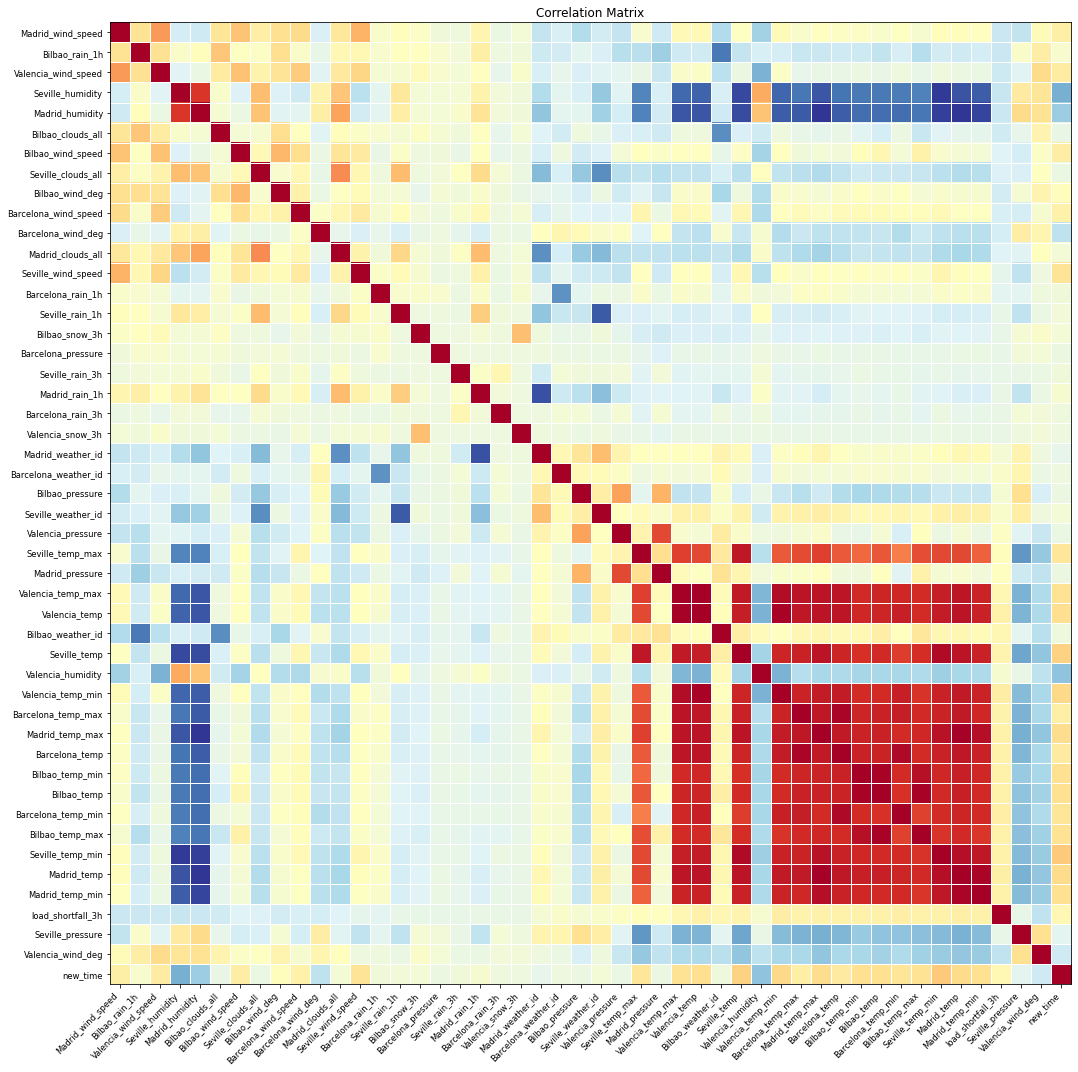

In [41]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

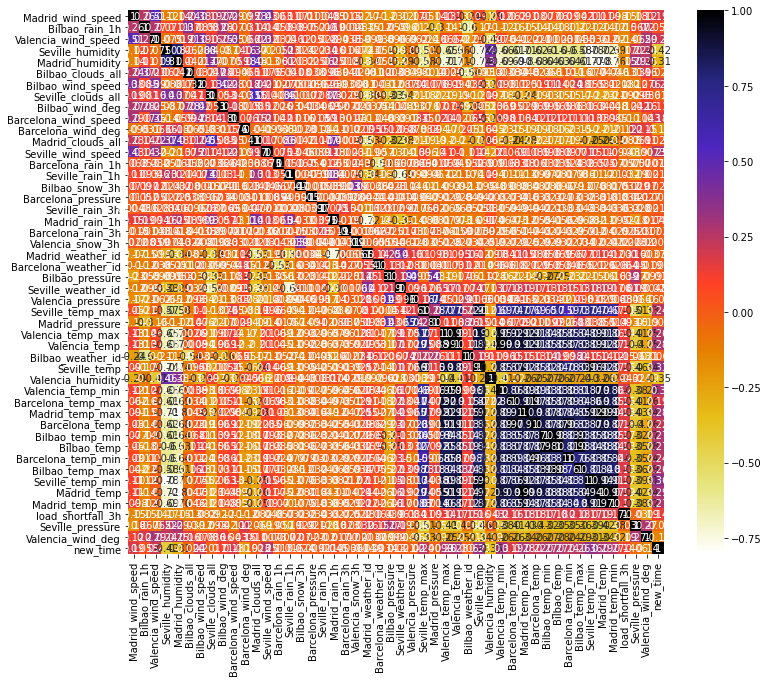

In [42]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [46]:
# create targets and features dataset
#X = df.drop('load_shortfall_3h', axis=1)
#y = df['load_shortfall_3h']

#X.head()

In [47]:
#y.head()

In [299]:

# import scaler method from sklearn
#from sklearn.preprocessing import StandardScaler

In [300]:
# create scaler object
#scaler = StandardScaler()

In [301]:
# create scaled version of the predictors (there is no need to scale the response)
#X_scaled = scaler.fit_transform(X)

In [28]:
# convert the scaled predictor values into a dataframe
#X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
#X_standardise.head()

In [303]:
#New_standardised_data
#target_column = df["load_shortfall_3h"]
#New_standardise = pd.concat([X_standardise,target_column], axis = 1)

In [23]:
# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X,
                                                   # y,
                                                   # test_size=0.20,
                                                    #random_state=100)

In [43]:
# create one or more ML models
from statsmodels.formula.api import ols

 #Model DataFrame with all of the columns:
dfm = df.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))


Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Valencia_pressure + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Seville_pressure + Valencia_wind_deg + new_time


In [44]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     36.34
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.25e-297
Time:                        09:47:41   Log-Likelihood:                -86660.
No. Observations:                8763   AIC:                         1.734e+05
Df Residuals:                    8715   BIC:                         1.738e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.165e+04 

In [29]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [30]:
#model_1=sm.OLS(y_train,X_train).fit()

In [48]:
#print(model_1.summary())

In [59]:
#selecting significant vars from pvalues
#significant_vars=['load_shortfall_3h','Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed','Seville_humidity','Bilbao_wind_deg','Barcelona_wind_speed','Barcelona_wind_deg','Madrid_clouds_all','Barcelona_rain_1h','Seville_rain_3h','Barcelona_rain_3h','Bilbao_pressure','Valencia_pressure','Valencia_temp_max','Valencia_humidity','Valencia_temp_min','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min','Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max','Seville_temp_min','Madrid_temp','Madrid_temp_min','Seville_pressure','Valencia_wind_deg','new_time']
#df_new=df[significant_vars]

In [45]:
##############DEALING WITH MULTICOLINEARITY


# Calculate correlations between predictor variables and the response variable
corrs = df.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [46]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df[col], df['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

Correlation_Coefficient   P_Value
Valencia_temp_min                    0.201863  0.000000
Seville_weather_id                   0.061104  0.000000
Seville_humidity                    -0.167290  0.000000
Barcelona_rain_1h                   -0.056633  0.000000
Bilbao_wind_speed                   -0.081602  0.000000
Madrid_clouds_all                   -0.081623  0.000000
Seville_clouds_all                  -0.091804  0.000000
Barcelona_weather_id                 0.063868  0.000000
Barcelona_wind_speed                -0.103633  0.000000
Bilbao_wind_deg                     -0.120800  0.000000
Bilbao_clouds_all                   -0.127293  0.000000
Valencia_wind_speed                 -0.142791  0.000000
Madrid_humidity                     -0.150536  0.000000
Madrid_wind_speed                   -0.150981  0.000000
Bilbao_rain_1h                      -0.152510  0.000000
Barcelona_wind_deg                  -0.116133  0.000000
Valencia_pressure                    0.084220  0.000000
Valencia_wind_deg                   -0.188674  0.000000
Seville_temp_max                     0.109834  0.000000
Madrid_pressure                      0.092638  0.000000
Bilbao_temp_min                      0.172920  0.000000
Valencia_temp                        0.173225  0.000000
Seville_temp_min                     0.174718  0.000000
Madrid_temp_min                      0.174744  0.000000
Bilbao_temp                          0.176411  0.000000
Seville_temp                         0.159343  0.000000
Bilbao_temp_max                      0.180934  0.000000
Barcelona_temp                       0.182673  0.000000
Bilbao_weather_id                    0.145875  0.000000
Madrid_temp                          0.186036  0.000000
Barcelona_temp_min                   0.195984  0.000000
Valencia_temp_max                    0.144270  0.000000
new_time                             0.139285  0.000000
Madrid_temp_max                      0.182548  0.000000
Barcelona_temp_max                   0.164734  0.000000
Seville_wind_speed                  -0.048433  0.000006
Valencia_humidity                    0.043140  0.000054
Bilbao_pressure                      0.039052  0.000256
Barcelona_pressure                  -0.034385  0.001285
Seville_rain_3h                     -0.032945  0.002040
Bilbao_snow_3h                      -0.031721  0.002981
Seville_rain_1h                     -0.031572  0.003118
Madrid_weather_id                    0.030868  0.003854
Seville_pressure                    -0.030434  0.004383
Madrid_rain_1h                      -0.027159  0.011008
Barcelona_rain_3h                   -0.024720  0.020665
Valencia_snow_3h                    -0.021633  0.042863

In [47]:
# The dependent variable remains the same:
y_data = df[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df[X_names]

In [48]:
#checking highly positive correlated variables so that we can drop some
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
corr_features=correlation(df,0.9)
len(set(corr_features))

12

In [50]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [51]:
# Lets take a new subset of our potential independent variables
X_remove = ['Barcelona_temp_min','Barcelona_temp_max','Bilbao_temp_max','Madrid_temp_min','Madrid_temp_max','Seville_temp_min','Valencia_temp_min']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Madrid_temp + Barcelona_temp + Bilbao_temp + Valencia_temp + Bilbao_temp_min + Seville_temp + Bilbao_weather_id + Valencia_temp_max + new_time + Seville_temp_max + Madrid_pressure + Valencia_pressure + Barcelona_weather_id + Seville_weather_id + Valencia_humidity + Bilbao_pressure + Madrid_weather_id + Valencia_snow_3h + Barcelona_rain_3h + Madrid_rain_1h + Seville_pressure + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Barcelona_pressure + Seville_wind_speed + Barcelona_rain_1h + Bilbao_wind_speed + Madrid_clouds_all + Seville_clouds_all + Barcelona_wind_speed + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Valencia_wind_speed + Madrid_humidity + Madrid_wind_speed + Bilbao_rain_1h + Seville_humidity + Valencia_wind_deg


In [52]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     39.64
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.99e-280
Time:                        09:48:05   Log-Likelihood:                -86712.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8722   BIC:                         1.738e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.635e+04 

In [53]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df.columns)
X_names.remove(y_name)
X_data = df[X_names]
y_data = df[y_name]

In [54]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [55]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [56]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
46              new_time  0.107136
5      Bilbao_clouds_all  0.105945
45     Valencia_wind_deg  0.102221
44      Seville_pressure  0.090924
8        Bilbao_wind_deg  0.080656
11     Madrid_clouds_all  0.078692
4        Madrid_humidity  0.067493
7     Seville_clouds_all  0.062181
10    Barcelona_wind_deg  0.061218
3       Seville_humidity  0.060892
32     Valencia_humidity  0.046143
43       Madrid_temp_min  0.041115
27       Madrid_pressure  0.040475
35       Madrid_temp_max  0.038809
30     Bilbao_weather_id  0.037692
42           Madrid_temp  0.037678
31          Seville_temp  0.034066
26      Seville_temp_max  0.033598
41      Seville_temp_min  0.033520
36        Barcelona_temp  0.031985
29         Valencia_temp  0.031211
34    Barcelona_temp_max  0.030093
39    Barcelona_temp_min  0.029827
25     Valencia_pressure  0.029404
33     Valencia_temp_min  0.029252
28     Valencia_temp_max  0.029065
38           Bilbao_temp  0.024880
37       Bilbao_temp_min  0.021878
22  Barcelona_weather_id  0.021340
40       Bilbao_temp_max  0.021109
12    Seville_wind_speed  0.020559
0      Madrid_wind_speed  0.020257
23       Bilbao_pressure  0.020208
9   Barcelona_wind_speed  0.020017
6      Bilbao_wind_speed  0.017923
21     Madrid_weather_id  0.016996
1         Bilbao_rain_1h  0.015615
24    Seville_weather_id  0.014185
14       Seville_rain_1h  0.003436
13     Barcelona_rain_1h  0.002797
18        Madrid_rain_1h  0.002588
2    Valencia_wind_speed  0.002150
19     Barcelona_rain_3h  0.001844
17       Seville_rain_3h  0.001537
15        Bilbao_snow_3h  0.000684
20      Valencia_snow_3h  0.000225
16    Barcelona_pressure  0.000198

In [57]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Seville_clouds_all  \
0          0.720000         0.615658               0.00                 0.0   
1          0.763636         0.622776               0.00                 0.0   
2          0.687273         0.619217               0.00                 0.0   
3          0.621818         0.533808               0.00                 0.0   
4          0.552727         0.540925               0.02                 0.0   

   Bilbao_wind_deg  Barcelona_wind_deg  Madrid_clouds_all  Seville_temp_max  \
0         0.621521            0.118519                0.0          0.045263   
1         0.615028            0.386111                0.0          0.059520   
2         0.596475            0.905556                0.0          0.138971   
3         0.555659            0.758333                0.0          0.275318   
4         0.514842            0.722222                0.0          0.277791   

   Madrid_pressure  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         0.395770       0.000000           0.993296      0.051072   
1         0.407855       0.045397           0.993296      0.067158   
2         0.419940       0.200319           0.993296      0.156803   
3         0.607251       0.370302           0.993296      0.310647   
4         0.975831       0.323817           0.993296      0.313437   

   Valencia_humidity  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0           0.728625            0.211393         0.019286        0.279352   
1           0.676580            0.200628         0.028350        0.266986   
2           0.617100            0.225004         0.156067        0.294986   
3           0.486989            0.269139         0.341654        0.345683   
4           0.535316            0.287721         0.317073        0.367027   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  Seville_pressure  \
0          0.091896     0.019827         0.021028               1.0   
1          0.107351     0.029145         0.030910               1.0   
2          0.193478     0.160443         0.170162               1.0   
3          0.341284     0.351233         0.372508               1.0   
4          0.343964     0.325963         0.345707               1.0   

   Valencia_wind_deg  new_time  
0           0.444444  0.142857  
1           1.000000  0.285714  
2           0.888889  0.428571  
3           0.777778  0.571429  
4           0.666667  0.714286

In [58]:
X_new.shape

(8763, 22)

In [59]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [60]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [61]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [62]:
selector_3.fit(X_normalize)

ValueError: No feature in X meets the variance threshold 0.15000

In [63]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]


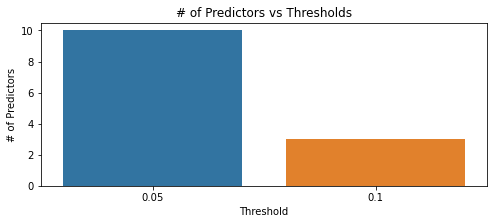

In [64]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1]]
thresholds = ['0.05', '0.1']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

In [65]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_deg + Madrid_clouds_all + Seville_temp_max + Madrid_pressure + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Seville_temp_min + Madrid_temp + Madrid_temp_min + Seville_pressure + Valencia_wind_deg + new_time


In [66]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     55.97
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.15e-230
Time:                        09:48:35   Log-Likelihood:                -86866.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8740   BIC:                         1.739e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.979e+04   5314

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [67]:
# Compare model performance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [69]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [70]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

In [71]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [72]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

In [73]:
# Choose best model and motivate why it is the best choice
from sklearn.metrics import mean_squared_error, r2_score

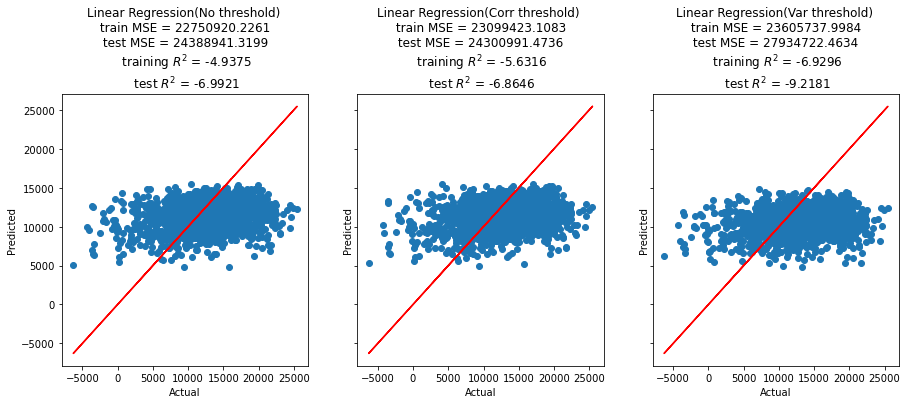

In [74]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic